In [1]:
## importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud
from nltk.util import ngrams

import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions


from unidecode import unidecode
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec

from autocorrect import Speller


import re


from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### problem statement

### data gathering

In [2]:
df2 = pd.read_csv("socal_media_data.csv")
df2

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,target
0,0,0,0,0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,0
1,1,1,1,1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,1
2,2,2,2,2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,0
3,3,3,3,3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,1
4,4,4,4,4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,727,727,728,732,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,1
728,728,728,729,733,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,1
729,729,729,730,734,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,1
730,730,730,731,735,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,1


In [3]:
df = df2[["Text","target"]]
df

,Text,target
0,Enjoying a beautiful day at the park! ...,0
1,Traffic was terrible this morning. ...,1
2,Just finished an amazing workout! 💪 ...,0
3,Excited about the upcoming weekend getaway! ...,1
4,Trying out a new recipe for dinner tonight. ...,2
...,...,...
727,Collaborating on a science project that receiv...,1
728,Attending a surprise birthday party organized ...,1
729,Successfully fundraising for a school charity ...,1
730,"Participating in a multicultural festival, cel...",1


### exporatory data analysis

In [4]:
df.shape

(732, 2)

In [5]:
df.isna().sum()

Text      0
target    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    732 non-null    object
 1   target  732 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


<AxesSubplot:xlabel='target', ylabel='count'>

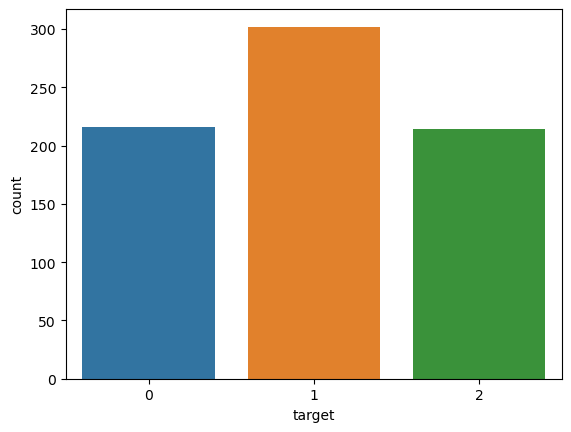

In [7]:
sns.countplot(df["target"])

In [8]:
def ngram_extractor(data,ngram_range):
    tokens = word_tokenize(data)
    ngram = ngrams(tokens,ngram_range)
    ngram_list1 = []
    for ngram1 in ngram:
        ngram_list1.append(' '.join(ngram1))
    return ngram_list1

In [9]:
list_unigrams = df.Text.apply(lambda x : ngram_extractor(x,1))
list_unigrams

0        [Enjoying, a, beautiful, day, at, the, park, !]
1             [Traffic, was, terrible, this, morning, .]
2           [Just, finished, an, amazing, workout, !, 💪]
3      [Excited, about, the, upcoming, weekend, getaw...
4      [Trying, out, a, new, recipe, for, dinner, ton...
                             ...                        
727    [Collaborating, on, a, science, project, that,...
728    [Attending, a, surprise, birthday, party, orga...
729    [Successfully, fundraising, for, a, school, ch...
730    [Participating, in, a, multicultural, festival...
731    [Organizing, a, virtual, talent, show, during,...
Name: Text, Length: 732, dtype: object

In [10]:
final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(50)
cnt

[('the', 808),
 ('.', 784),
 ('of', 623),
 ('a', 621),
 (',', 517),
 ('in', 261),
 ('to', 133),
 ('#', 128),
 ('and', 111),
 ('with', 107),
 ('for', 99),
 ('on', 91),
 ('!', 84),
 ('by', 70),
 ("'s", 65),
 ('through', 52),
 ('an', 49),
 ('my', 41),
 ('at', 40),
 ('new', 39),
 ('each', 39),
 ('In', 39),
 ('that', 38),
 ('life', 37),
 ('as', 36),
 ('A', 33),
 ('is', 32),
 (':', 29),
 ("'", 27),
 ('day', 25),
 ('heart', 25),
 ('dreams', 25),
 ('after', 24),
 ('into', 24),
 ('like', 24),
 ('night', 23),
 ('joy', 23),
 ('The', 22),
 ('from', 21),
 ('laughter', 21),
 ('world', 20),
 ('beauty', 20),
 ('journey', 20),
 ('sky', 19),
 ('art', 18),
 ('during', 18),
 ('symphony', 18),
 ('where', 18),
 ('garden', 17),
 ('nature', 17)]

In [11]:
list_bigrams = df.Text.apply(lambda x : ngram_extractor(x,2))
list_bigrams

0      [Enjoying a, a beautiful, beautiful day, day a...
1      [Traffic was, was terrible, terrible this, thi...
2      [Just finished, finished an, an amazing, amazi...
3      [Excited about, about the, the upcoming, upcom...
4      [Trying out, out a, a new, new recipe, recipe ...
                             ...                        
727    [Collaborating on, on a, a science, science pr...
728    [Attending a, a surprise, surprise birthday, b...
729    [Successfully fundraising, fundraising for, fo...
730    [Participating in, in a, a multicultural, mult...
731    [Organizing a, a virtual, virtual talent, tale...
Name: Text, Length: 732, dtype: object

In [12]:
final_bigram = []
for bigram in list_bigrams:
    final_bigram.extend(bigram)
cnt = Counter(final_bigram).most_common(50)
cnt

[('in the', 147),
 (', a', 132),
 (', the', 74),
 ('of a', 72),
 ('by the', 58),
 ('. #', 55),
 ('of the', 44),
 ('on the', 41),
 ('In the', 39),
 ('on a', 35),
 ('in a', 34),
 (', each', 34),
 ('for the', 33),
 ('to the', 33),
 ('through the', 29),
 ('a new', 26),
 ('for a', 24),
 ('of life', 20),
 ('with a', 19),
 ('beauty of', 19),
 ('the beauty', 18),
 ('at the', 16),
 ('sense of', 15),
 ("life 's", 15),
 ('the world', 14),
 ('the night', 14),
 ('from the', 14),
 ('symphony of', 14),
 ('as the', 13),
 ('of nature', 12),
 ('a journey', 12),
 ('echoes of', 12),
 ('of an', 12),
 ('the heart', 12),
 ('concert ,', 12),
 ('is a', 11),
 ('with the', 11),
 ('at a', 11),
 ('like a', 11),
 (', where', 11),
 ('tales of', 11),
 ('the garden', 11),
 ('about the', 10),
 ('Exploring the', 10),
 ('a sense', 10),
 ('during a', 10),
 ('the soul', 10),
 ('into the', 10),
 ('garden of', 10),
 ('a challenging', 9)]

In [13]:
list_trigrams = df.Text.apply(lambda x : ngram_extractor(x,2))
list_trigrams

0      [Enjoying a, a beautiful, beautiful day, day a...
1      [Traffic was, was terrible, terrible this, thi...
2      [Just finished, finished an, an amazing, amazi...
3      [Excited about, about the, the upcoming, upcom...
4      [Trying out, out a, a new, new recipe, recipe ...
                             ...                        
727    [Collaborating on, on a, a science, science pr...
728    [Attending a, a surprise, surprise birthday, b...
729    [Successfully fundraising, fundraising for, fo...
730    [Participating in, in a, a multicultural, mult...
731    [Organizing a, a virtual, virtual talent, tale...
Name: Text, Length: 732, dtype: object

In [14]:
final_trigrams = []
for trigrams in list_trigrams:
    final_trigrams.extend(bigram)
cnt = Counter(final_trigrams).most_common(50)
cnt

[('Organizing a', 732),
 ('a virtual', 732),
 ('virtual talent', 732),
 ('talent show', 732),
 ('show during', 732),
 ('during challenging', 732),
 ('challenging times', 732),
 ('times ,', 732),
 (', bringing', 732),
 ('bringing smiles', 732),
 ('smiles to', 732),
 ('to classmates', 732),
 ("classmates '", 732),
 ("' faces", 732),
 ('faces !', 732)]

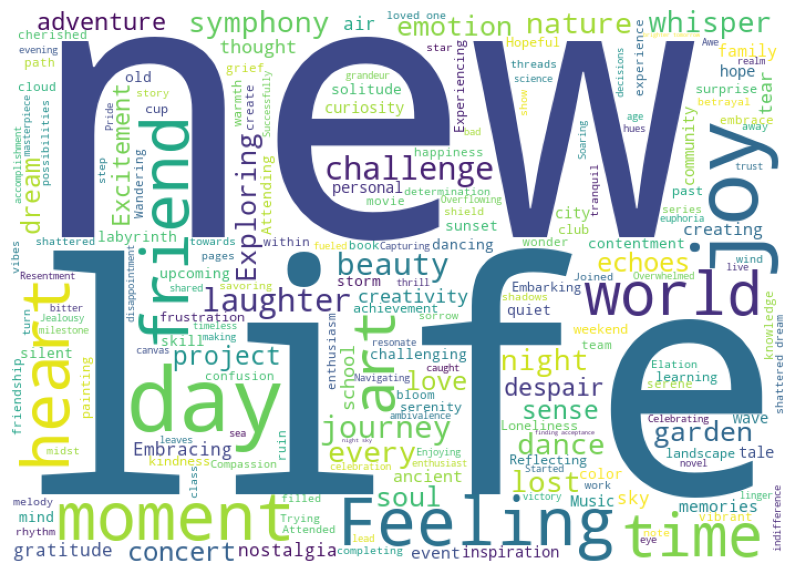

In [15]:
def wordcloud(data,column):
    df_ = data[column].str.cat(sep=" ")
    wordcloud = WordCloud(width=700,height=500,background_color="white").generate(df_)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud(df,"Text")

### text preprocessing

In [16]:
# preprocessing
# 1. remove spaces, newlines

def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace('\t',' ').replace('\\',' ')
    return clean_text

#2. Contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

#3.handling accented characters
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

#4.Cleaning (tokenization,normalization,removing stopwords and special characters)
stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')


def clean_data(data):
    tokens = word_tokenize(data)                      
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

# 5. Autocorrect
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

#6. Lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return final_data


def join_list(data):
    return " ".join(data)

In [17]:
clean_text = df.Text.apply(remove_spaces)

clean_text = clean_text.apply(expand_text)

clean_text = clean_text.apply(handling_accented)

clean_text = clean_text.apply(clean_data)

clean_text = clean_text.apply(lemmatization)

clean_text = clean_text.apply(join_list)

In [18]:
def ngram_extractor(data,ngram_range):
    ngram = ngrams(data,ngram_range)
    ngram_list1 = []
    for ngram1 in ngram:
        ngram_list1.append(' '.join(ngram1))
    return ngram_list1

In [19]:
list_trigrams = clean_text.apply(lambda x : ngram_extractor(x,1))

In [20]:
final_trigrams = []
for trigrams in list_trigrams:
    final_trigrams.extend(bigram)
cnt = Counter(final_trigrams).most_common(50)
cnt

[('Organizing a', 732),
 ('a virtual', 732),
 ('virtual talent', 732),
 ('talent show', 732),
 ('show during', 732),
 ('during challenging', 732),
 ('challenging times', 732),
 ('times ,', 732),
 (', bringing', 732),
 ('bringing smiles', 732),
 ('smiles to', 732),
 ('to classmates', 732),
 ("classmates '", 732),
 ("' faces", 732),
 ('faces !', 732)]

### feature engineering

In [21]:
count_vect = CountVectorizer()                              ###  with count vectorizer
x = count_vect.fit_transform(clean_text).toarray()
y = df["target"].values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [23]:
print(f"X train: {x_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {x_test.shape}")
print(f"y test: {y_test.shape}")

X train: (585, 2231)
y train: (585,)
X test: (147, 2231)
y test: (147,)


### model training and model evaluation

In [24]:
model_details = []
training_accuracy_list = []
testing_accuracy_list = []

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



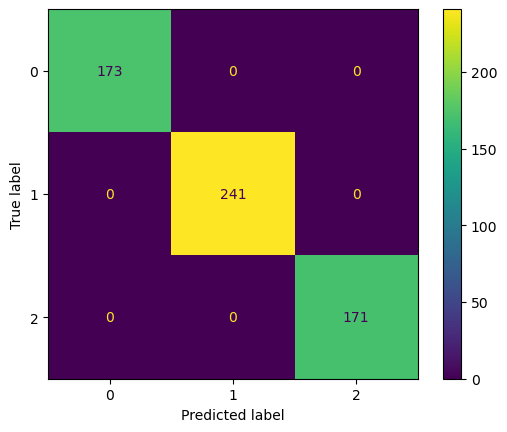

In [25]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
model_details.append("logistic_regression")



y_pred_train = logistic_model.predict(x_train)

plot_confusion_matrix(logistic_model,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)


0.7687074829931972

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        36
           1       0.89      0.75      0.81        72
           2       0.70      0.77      0.73        39

    accuracy                           0.77       147
   macro avg       0.75      0.77      0.76       147
weighted avg       0.78      0.77      0.77       147



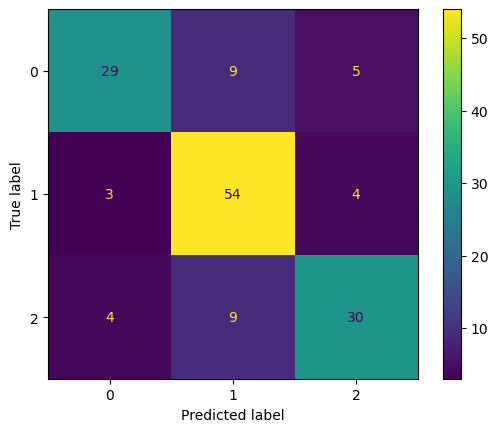

In [26]:
y_pred_test = logistic_model.predict(x_test)

plot_confusion_matrix(logistic_model,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)



print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [27]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(x_train, y_train)
model_details.append("Decision_Tree")

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



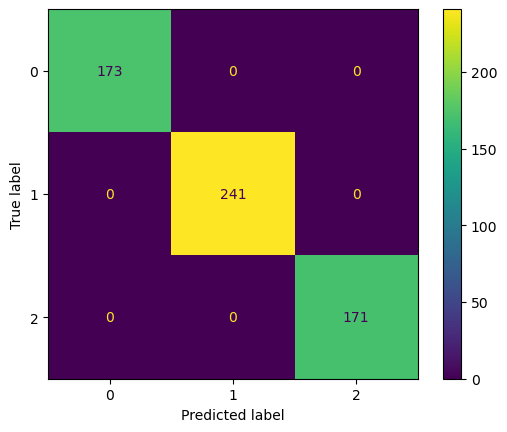

In [28]:
y_pred_train = dt_clf.predict(x_train)

plot_confusion_matrix(dt_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.6802721088435374

              precision    recall  f1-score   support

           0       0.65      0.68      0.67        41
           1       0.79      0.68      0.73        71
           2       0.56      0.69      0.62        35

    accuracy                           0.68       147
   macro avg       0.67      0.68      0.67       147
weighted avg       0.69      0.68      0.68       147



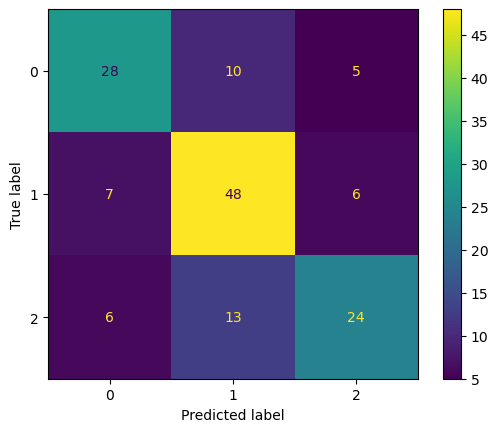

In [29]:
y_pred_test = dt_clf.predict(x_test)

plot_confusion_matrix(dt_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)



print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [30]:
dt_model = DecisionTreeClassifier(random_state=11)

hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}  
gscv_dt_clf = GridSearchCV(dt_model, hyperparameter, cv=5,n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [31]:
gscv_dt_clf.best_estimator_ 

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       random_state=11)

In [32]:
gscv_dt_clf.fit(x_train, y_train)
model_details.append("Decision_Tree With Hyperparameter tuning")

0.6358974358974359

              precision    recall  f1-score   support

           0       0.39      0.85      0.54        80
           1       0.95      0.54      0.69       423
           2       0.44      0.93      0.60        82

    accuracy                           0.64       585
   macro avg       0.59      0.77      0.61       585
weighted avg       0.80      0.64      0.65       585



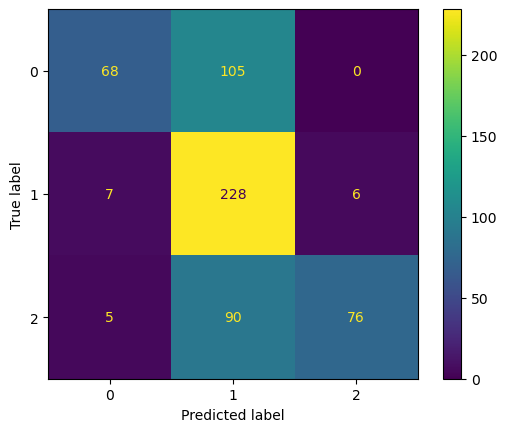

In [33]:
y_pred_train = gscv_dt_clf.predict(x_train)

plot_confusion_matrix(gscv_dt_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.5782312925170068

              precision    recall  f1-score   support

           0       0.28      0.86      0.42        14
           1       0.95      0.51      0.67       113
           2       0.35      0.75      0.48        20

    accuracy                           0.58       147
   macro avg       0.53      0.71      0.52       147
weighted avg       0.80      0.58      0.62       147



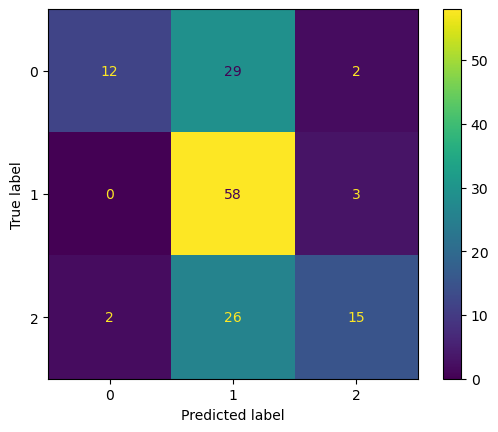

In [34]:
y_pred_test = gscv_dt_clf.predict(x_test)

plot_confusion_matrix(gscv_dt_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)



print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [35]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(x_train, y_train)
model_details.append("Random Forest")

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



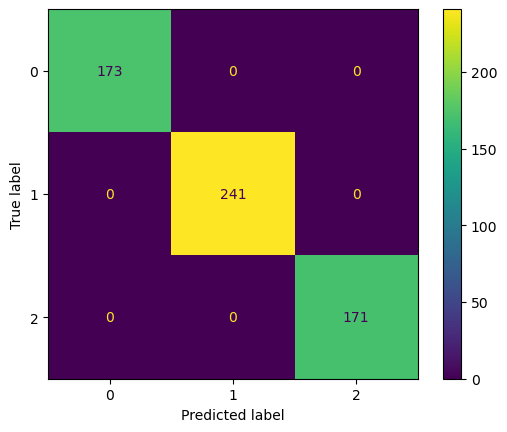

In [36]:
y_pred_train = rf_clf.predict(x_train)

plot_confusion_matrix(rf_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.7346938775510204

              precision    recall  f1-score   support

           0       0.60      0.84      0.70        31
           1       0.92      0.67      0.78        83
           2       0.60      0.79      0.68        33

    accuracy                           0.73       147
   macro avg       0.71      0.77      0.72       147
weighted avg       0.78      0.73      0.74       147



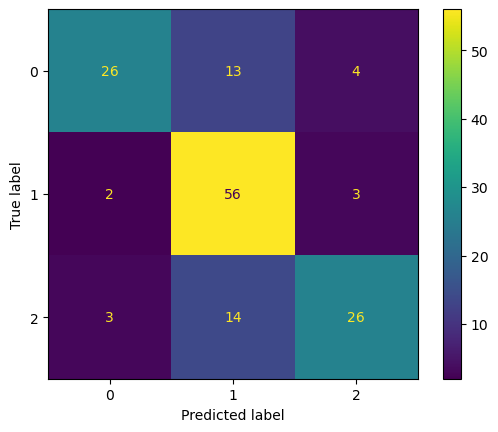

In [37]:
y_pred_test = rf_clf.predict(x_test)

plot_confusion_matrix(rf_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [38]:
rf_model = RandomForestClassifier(random_state=10)

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True]}

rscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
rscv_rf_model.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,...
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
    

In [39]:
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=12, n_estimators=47, oob_score=True,
                       random_state=10)

In [40]:
rscv_rf_model.fit(x_train, y_train)

model_details.append("Random _Forest With Hyperparameter tuning")

0.5982905982905983

              precision    recall  f1-score   support

           0       0.24      0.93      0.38        44
           1       1.00      0.51      0.68       473
           2       0.40      1.00      0.57        68

    accuracy                           0.60       585
   macro avg       0.54      0.81      0.54       585
weighted avg       0.87      0.60      0.64       585



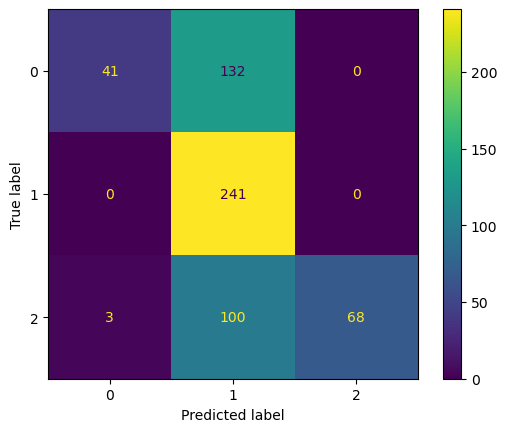

In [41]:
y_pred_train = rscv_rf_model.predict(x_train)

plot_confusion_matrix(rscv_rf_model,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.5510204081632653

              precision    recall  f1-score   support

           0       0.21      0.90      0.34        10
           1       1.00      0.49      0.66       124
           2       0.26      0.85      0.39        13

    accuracy                           0.55       147
   macro avg       0.49      0.75      0.46       147
weighted avg       0.88      0.55      0.61       147



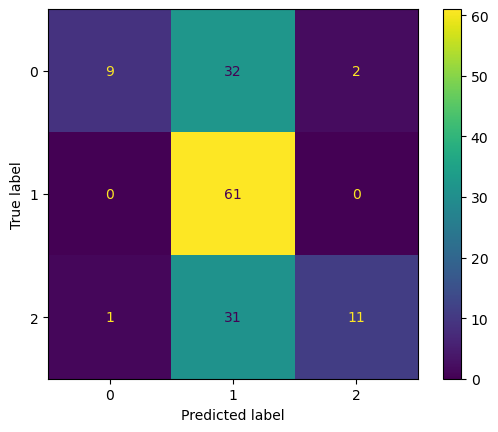

In [42]:
y_pred_test = rscv_rf_model.predict(x_test)

plot_confusion_matrix(rscv_rf_model,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [43]:
adb_clf = AdaBoostClassifier(random_state=30)
adb_clf.fit(x_train, y_train)

model_details.append("AdaBost")


0.7504273504273504

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       140
           1       0.90      0.66      0.76       332
           2       0.61      0.92      0.73       113

    accuracy                           0.75       585
   macro avg       0.73      0.80      0.75       585
weighted avg       0.79      0.75      0.75       585



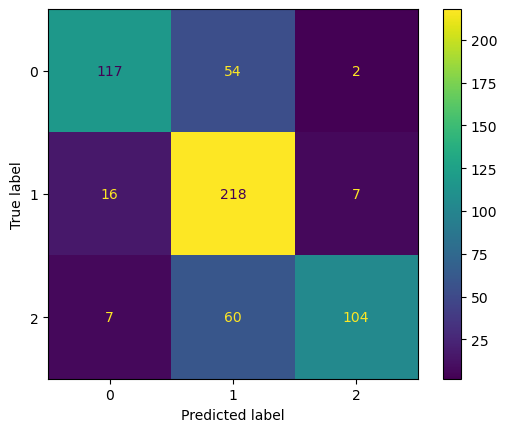

In [44]:
y_pred_train = adb_clf.predict(x_train)

plot_confusion_matrix(adb_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.6054421768707483

              precision    recall  f1-score   support

           0       0.49      0.75      0.59        28
           1       0.84      0.54      0.65        95
           2       0.40      0.71      0.51        24

    accuracy                           0.61       147
   macro avg       0.57      0.67      0.58       147
weighted avg       0.70      0.61      0.62       147



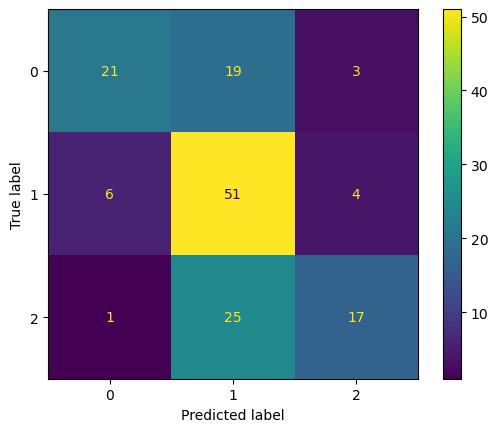

In [45]:
y_pred_test = adb_clf.predict(x_test)

plot_confusion_matrix(adb_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [46]:
adb_clf = AdaBoostClassifier(random_state=30)

param_grid = {
            "n_estimators" : np.arange(10,200,2),
            "learning_rate" : np.arange(0,2,0.001)
                }

rscv_adb_clf = RandomizedSearchCV(adb_clf, param_grid, cv=7)
rscv_adb_clf.fit(x_train, y_train)


RandomizedSearchCV(cv=7, estimator=AdaBoostClassifier(random_state=30),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,
        36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,
        62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,
        88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112,
       114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138,
       140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164,
       166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190,
       192, 194, 196, 198])})

In [47]:
rscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=1.752, n_estimators=46, random_state=30)

In [48]:
rscv_adb_clf.fit(x_train, y_train)

model_details.append("AdaBost_with_hyperparameter_tuning")

0.7675213675213676

              precision    recall  f1-score   support

           0       0.60      0.89      0.72       117
           1       0.95      0.66      0.78       347
           2       0.67      0.95      0.79       121

    accuracy                           0.77       585
   macro avg       0.74      0.83      0.76       585
weighted avg       0.83      0.77      0.77       585



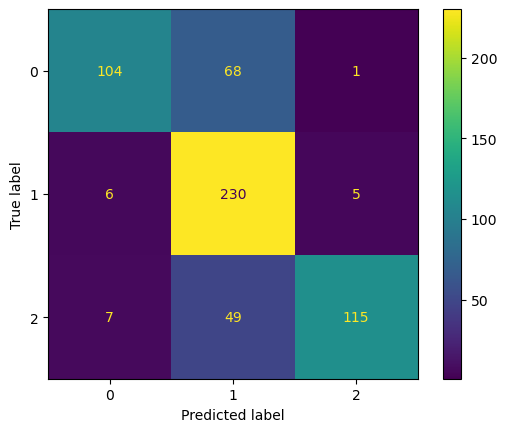

In [49]:
y_pred_train = rscv_adb_clf.predict(x_train)

plot_confusion_matrix(rscv_adb_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.6666666666666666

              precision    recall  f1-score   support

           0       0.44      0.83      0.58        23
           1       0.92      0.60      0.73        93
           2       0.53      0.74      0.62        31

    accuracy                           0.67       147
   macro avg       0.63      0.72      0.64       147
weighted avg       0.76      0.67      0.68       147



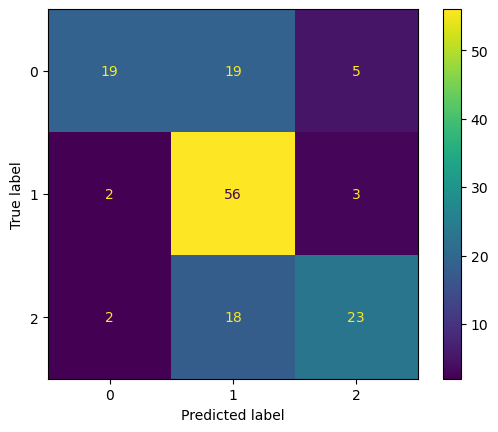

In [50]:
y_pred_test = rscv_adb_clf.predict(x_test)

plot_confusion_matrix(rscv_adb_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [51]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
model_details.append("Knn_Model")

0.770940170940171

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       189
           1       0.80      0.76      0.78       254
           2       0.67      0.81      0.73       142

    accuracy                           0.77       585
   macro avg       0.77      0.78      0.77       585
weighted avg       0.78      0.77      0.77       585



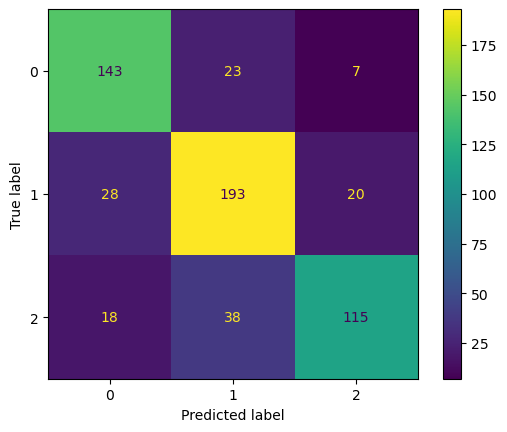

In [52]:
y_pred_train = knn_clf.predict(x_train)

plot_confusion_matrix(knn_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.6190476190476191

              precision    recall  f1-score   support

           0       0.65      0.56      0.60        50
           1       0.69      0.68      0.68        62
           2       0.49      0.60      0.54        35

    accuracy                           0.62       147
   macro avg       0.61      0.61      0.61       147
weighted avg       0.63      0.62      0.62       147



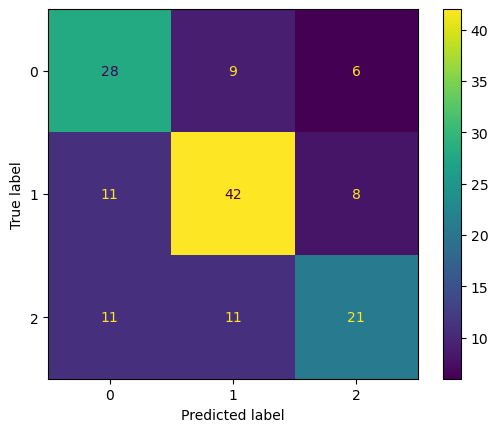

In [53]:
y_pred_test = knn_clf.predict(x_test)

plot_confusion_matrix(knn_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [54]:
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors" : np.arange(3,30),
                  "p": [1,2]}

gscv_knn_clf = GridSearchCV(knn_clf, param_grid, cv = 5 , n_jobs = -1) 
gscv_knn_clf.fit(x_train, y_train) 



GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [55]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [56]:
model_details.append("knn_model_with_Hyperparameter_Tuning")

0.811965811965812

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       215
           1       0.72      0.92      0.81       190
           2       0.86      0.82      0.84       180

    accuracy                           0.81       585
   macro avg       0.82      0.82      0.81       585
weighted avg       0.83      0.81      0.81       585



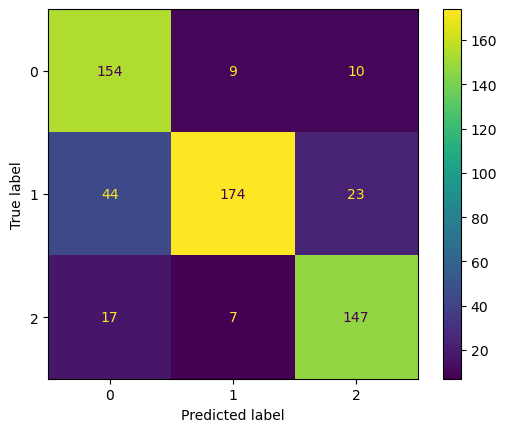

In [57]:
y_pred_train = gscv_knn_clf.predict(x_train)

plot_confusion_matrix(gscv_knn_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.6122448979591837

              precision    recall  f1-score   support

           0       0.70      0.49      0.58        61
           1       0.57      0.76      0.65        46
           2       0.58      0.62      0.60        40

    accuracy                           0.61       147
   macro avg       0.62      0.63      0.61       147
weighted avg       0.63      0.61      0.61       147



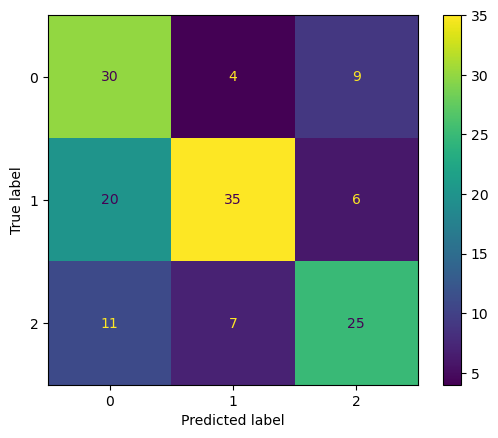

In [58]:
y_pred_test = gscv_knn_clf.predict(x_test)

plot_confusion_matrix(gscv_knn_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [59]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
model_details.append("SVM")

0.9863247863247864

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       169
           1       1.00      0.97      0.98       249
           2       0.98      1.00      0.99       167

    accuracy                           0.99       585
   macro avg       0.98      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585



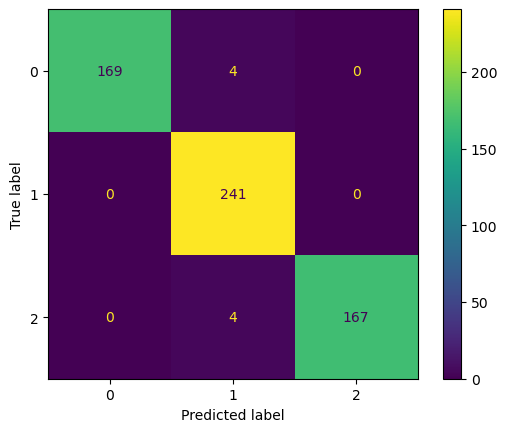

In [60]:
y_pred_train = svm_clf.predict(x_train)

plot_confusion_matrix(svm_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.673469387755102

              precision    recall  f1-score   support

           0       0.53      0.85      0.66        27
           1       0.93      0.59      0.72        97
           2       0.44      0.83      0.58        23

    accuracy                           0.67       147
   macro avg       0.64      0.76      0.65       147
weighted avg       0.78      0.67      0.69       147



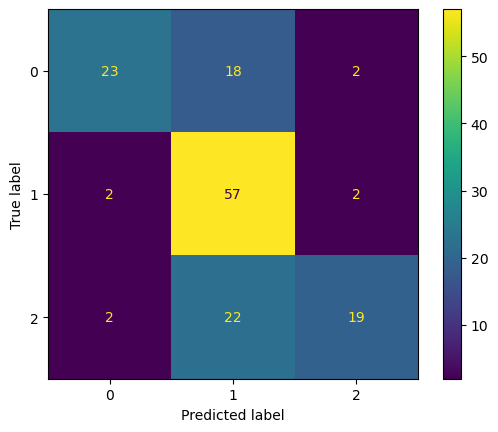

In [61]:
y_pred_test = svm_clf.predict(x_test)

plot_confusion_matrix(svm_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [62]:
svm_clf = SVC()

param_grid = {"C": np.arange(1,1000), "kernel":['linear', 'poly', 'rbf', 'sigmoid']}  # bydefault kernel = rbf

rscv_svm = RandomizedSearchCV(svm_clf, param_grid, cv = 5, n_jobs=-1)
rscv_svm.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  9...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991

In [63]:
rscv_svm.best_estimator_
rscv_svm.fit(x_train, y_train)
model_details.append("svm_hyperparameter_tunning")

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



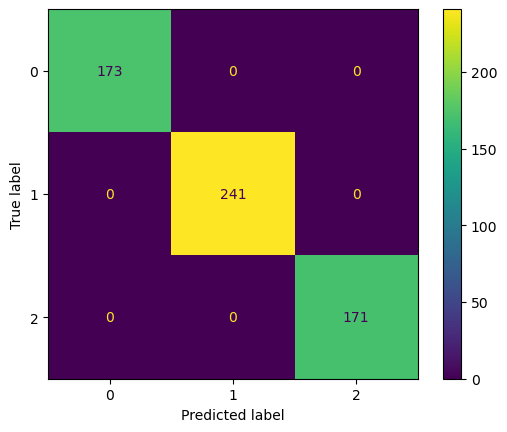

In [64]:
y_pred_train = rscv_svm.predict(x_train)

plot_confusion_matrix(rscv_svm,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.7414965986394558

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        38
           1       0.84      0.74      0.78        69
           2       0.70      0.75      0.72        40

    accuracy                           0.74       147
   macro avg       0.73      0.74      0.73       147
weighted avg       0.75      0.74      0.74       147



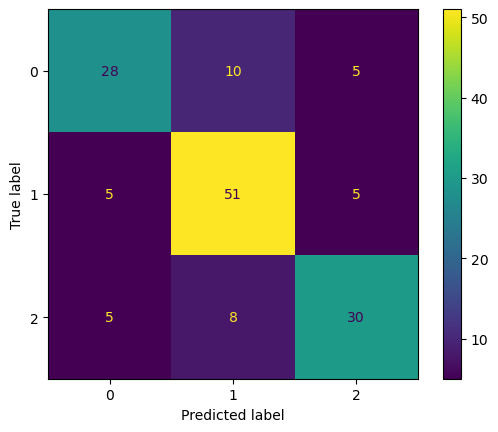

In [65]:
y_pred_test = rscv_svm.predict(x_test)

plot_confusion_matrix(rscv_svm,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [66]:
### calculate accuracy with tfidf 

In [67]:
training_accuracy = []
testing_accuracy = []

In [68]:
tfidf_vect = TfidfVectorizer()
x = tfidf_vect.fit_transform(clean_text).toarray()
y = df["target"]

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

0.9914529914529915

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       170
           1       1.00      0.98      0.99       246
           2       0.99      1.00      0.99       169

    accuracy                           0.99       585
   macro avg       0.99      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585



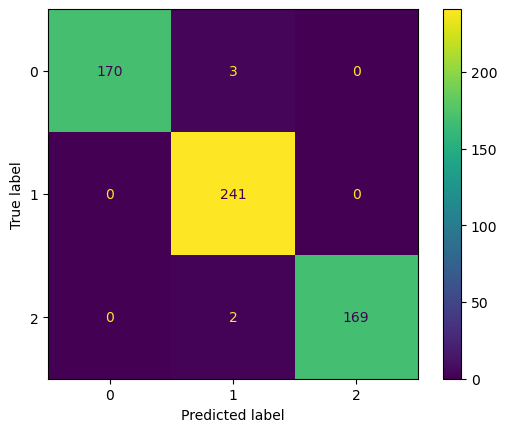

In [70]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
# model_details.append("logistic_regression")



y_pred_train = logistic_model.predict(x_train)

plot_confusion_matrix(logistic_model,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)


0.6938775510204082

              precision    recall  f1-score   support

           0       0.53      0.82      0.65        28
           1       0.92      0.62      0.74        91
           2       0.53      0.82      0.65        28

    accuracy                           0.69       147
   macro avg       0.66      0.75      0.68       147
weighted avg       0.77      0.69      0.70       147



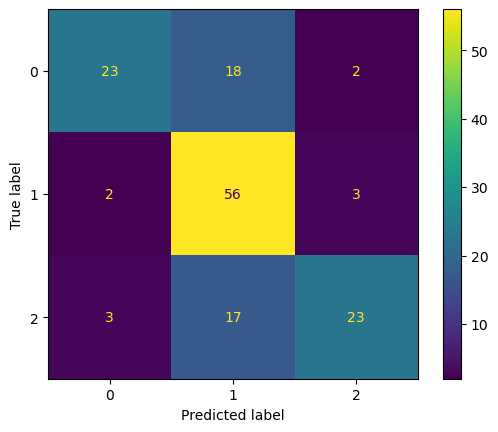

In [71]:
y_pred_test = logistic_model.predict(x_test)

plot_confusion_matrix(logistic_model,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)



print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [72]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(x_train, y_train)
# model_details.append("Decision_Tree")

DecisionTreeClassifier(random_state=11)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



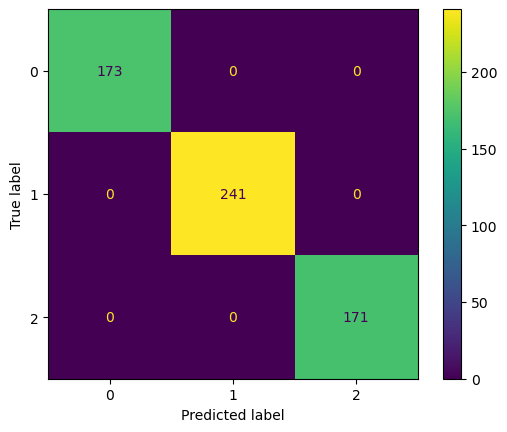

In [73]:
y_pred_train = dt_clf.predict(x_train)

plot_confusion_matrix(dt_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.7210884353741497

              precision    recall  f1-score   support

           0       0.65      0.72      0.68        39
           1       0.77      0.71      0.74        66
           2       0.72      0.74      0.73        42

    accuracy                           0.72       147
   macro avg       0.71      0.72      0.72       147
weighted avg       0.72      0.72      0.72       147



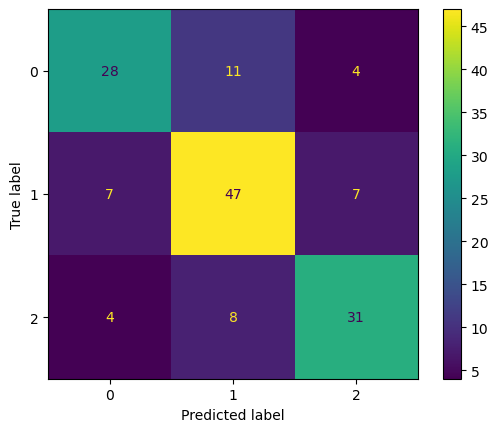

In [74]:
y_pred_test = dt_clf.predict(x_test)

plot_confusion_matrix(dt_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)



print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [75]:
dt_model = DecisionTreeClassifier(random_state=11)

hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}  
gscv_dt_clf = GridSearchCV(dt_model, hyperparameter, cv=5,n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [76]:
gscv_dt_clf.best_estimator_ 

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=10,
                       random_state=11)

0.6376068376068376

              precision    recall  f1-score   support

           0       0.36      0.95      0.52        65
           1       0.98      0.54      0.69       439
           2       0.44      0.94      0.60        81

    accuracy                           0.64       585
   macro avg       0.59      0.81      0.61       585
weighted avg       0.83      0.64      0.66       585



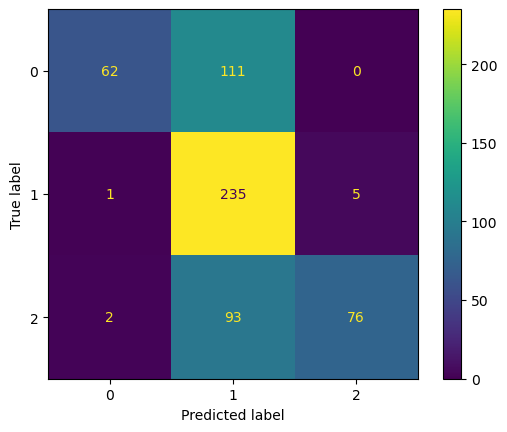

In [77]:
y_pred_train = gscv_dt_clf.predict(x_train)

plot_confusion_matrix(gscv_dt_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.5782312925170068

              precision    recall  f1-score   support

           0       0.28      0.92      0.43        13
           1       0.95      0.51      0.66       114
           2       0.35      0.75      0.48        20

    accuracy                           0.58       147
   macro avg       0.53      0.73      0.52       147
weighted avg       0.81      0.58      0.62       147



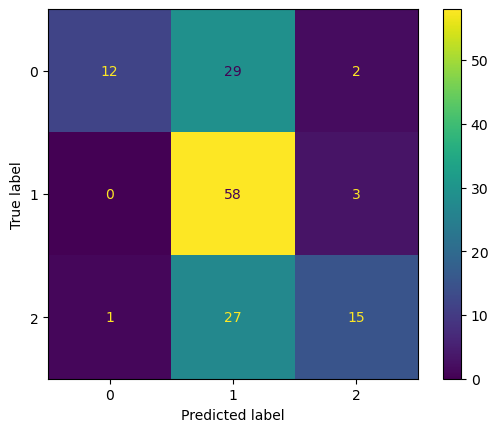

In [78]:
y_pred_test = gscv_dt_clf.predict(x_test)

plot_confusion_matrix(gscv_dt_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)



print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [79]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(x_train, y_train)
# model_details.append("Random Forest")

RandomForestClassifier(random_state=10)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



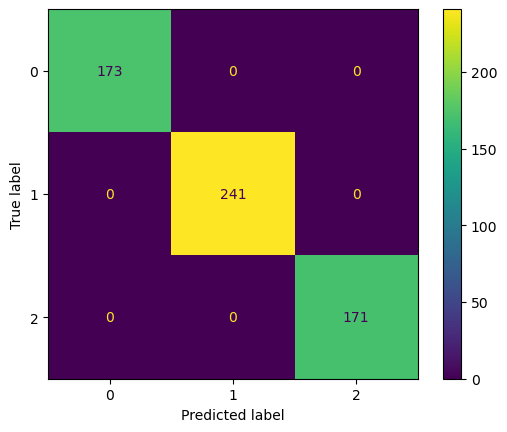

In [80]:
y_pred_train = rf_clf.predict(x_train)

plot_confusion_matrix(rf_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.7074829931972789

              precision    recall  f1-score   support

           0       0.53      0.77      0.63        30
           1       0.93      0.65      0.77        88
           2       0.56      0.83      0.67        29

    accuracy                           0.71       147
   macro avg       0.68      0.75      0.69       147
weighted avg       0.78      0.71      0.72       147



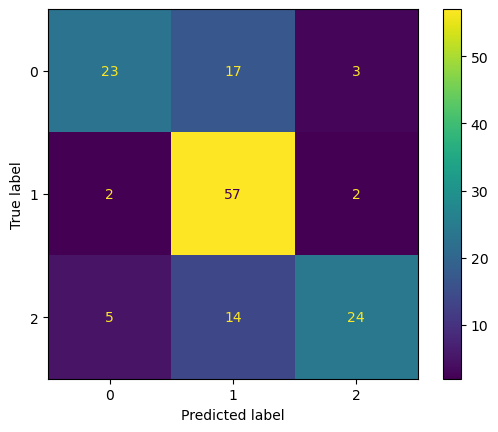

In [81]:
y_pred_test = rf_clf.predict(x_test)

plot_confusion_matrix(rf_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [82]:
rf_model = RandomForestClassifier(random_state=10)

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True]}

rscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
rscv_rf_model.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,...
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
    

In [83]:
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=7,
                       n_estimators=137, oob_score=True, random_state=10)

0.5367521367521367

              precision    recall  f1-score   support

           0       0.27      1.00      0.42        46
           1       1.00      0.47      0.64       512
           2       0.16      1.00      0.27        27

    accuracy                           0.54       585
   macro avg       0.47      0.82      0.44       585
weighted avg       0.90      0.54      0.61       585



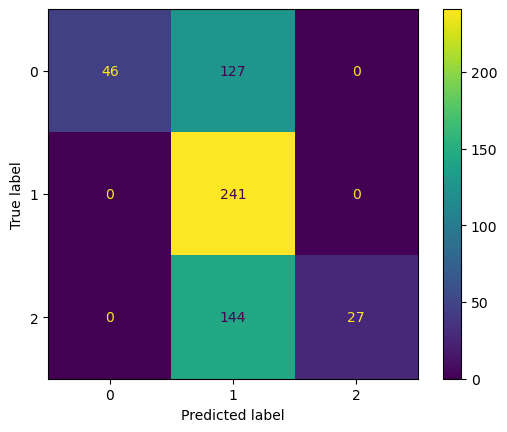

In [84]:
y_pred_train = rscv_rf_model.predict(x_train)

plot_confusion_matrix(rscv_rf_model,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.48299319727891155

              precision    recall  f1-score   support

           0       0.16      1.00      0.28         7
           1       1.00      0.45      0.62       137
           2       0.07      1.00      0.13         3

    accuracy                           0.48       147
   macro avg       0.41      0.82      0.34       147
weighted avg       0.94      0.48      0.59       147



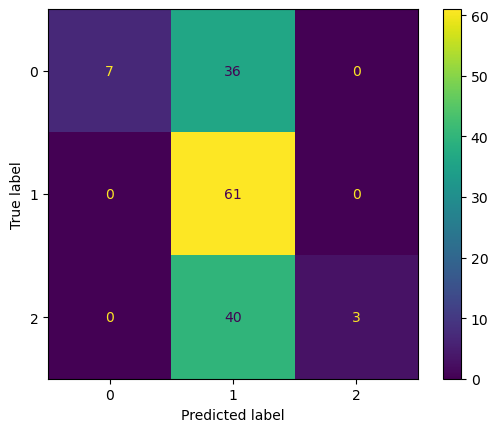

In [85]:
y_pred_test = rscv_rf_model.predict(x_test)

plot_confusion_matrix(rscv_rf_model,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [86]:
adb_clf = AdaBoostClassifier(random_state=30)
adb_clf.fit(x_train, y_train)

# model_details.append("AdaBost")


AdaBoostClassifier(random_state=30)

0.8136752136752137

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       143
           1       0.89      0.74      0.81       292
           2       0.76      0.87      0.81       150

    accuracy                           0.81       585
   macro avg       0.80      0.84      0.82       585
weighted avg       0.83      0.81      0.81       585



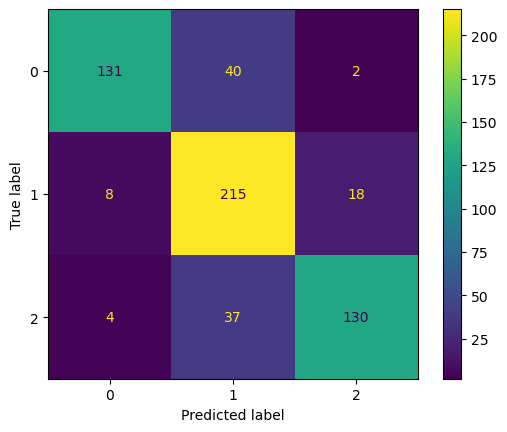

In [87]:
y_pred_train = adb_clf.predict(x_train)

plot_confusion_matrix(adb_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.6462585034013606

              precision    recall  f1-score   support

           0       0.40      0.71      0.51        24
           1       0.87      0.64      0.74        83
           2       0.58      0.62      0.60        40

    accuracy                           0.65       147
   macro avg       0.62      0.66      0.62       147
weighted avg       0.71      0.65      0.66       147



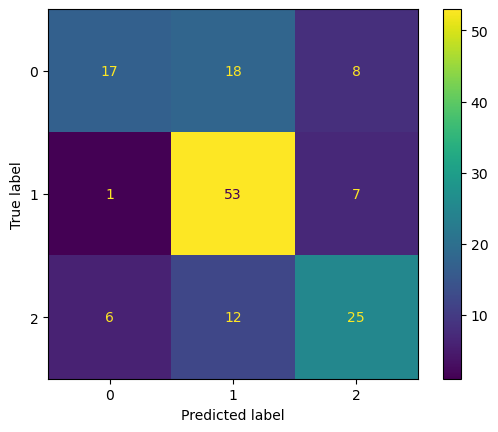

In [88]:
y_pred_test = adb_clf.predict(x_test)

plot_confusion_matrix(adb_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [89]:
adb_clf = AdaBoostClassifier(random_state=30)

param_grid = {
            "n_estimators" : np.arange(10,200,2),
            "learning_rate" : np.arange(0,2,0.001)
                }

rscv_adb_clf = RandomizedSearchCV(adb_clf, param_grid, cv=7)
rscv_adb_clf.fit(x_train, y_train)


RandomizedSearchCV(cv=7, estimator=AdaBoostClassifier(random_state=30),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,
        36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,
        62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,
        88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112,
       114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138,
       140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164,
       166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190,
       192, 194, 196, 198])})

In [90]:
rscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=1.4060000000000001, n_estimators=100,
                   random_state=30)

0.8444444444444444

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       130
           1       0.93      0.76      0.84       295
           2       0.88      0.94      0.91       160

    accuracy                           0.84       585
   macro avg       0.83      0.87      0.84       585
weighted avg       0.86      0.84      0.85       585



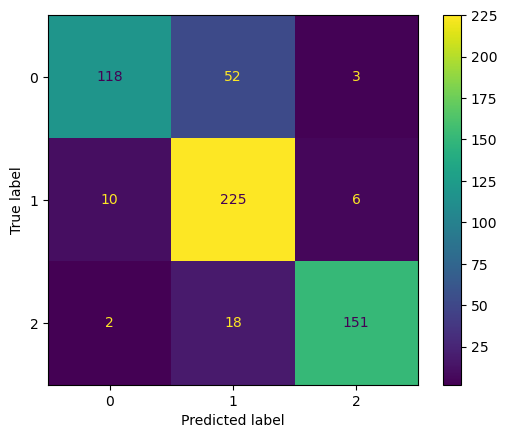

In [91]:
y_pred_train = rscv_adb_clf.predict(x_train)

plot_confusion_matrix(rscv_adb_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.6870748299319728

              precision    recall  f1-score   support

           0       0.51      0.79      0.62        28
           1       0.84      0.64      0.72        80
           2       0.65      0.72      0.68        39

    accuracy                           0.69       147
   macro avg       0.67      0.71      0.68       147
weighted avg       0.73      0.69      0.69       147



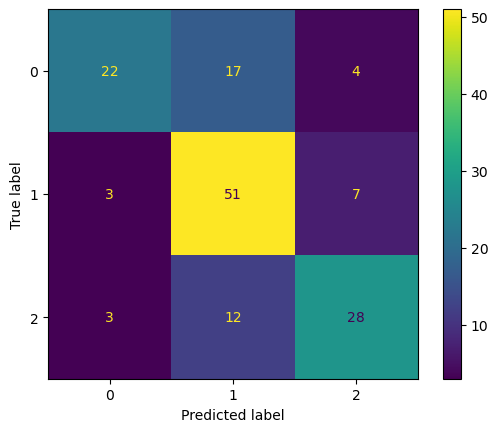

In [92]:
y_pred_test = rscv_adb_clf.predict(x_test)

plot_confusion_matrix(rscv_adb_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [93]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
# model_details.append("Knn_Normalization Model")

KNeighborsClassifier()

0.7794871794871795

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       202
           1       0.80      0.82      0.81       234
           2       0.71      0.81      0.76       149

    accuracy                           0.78       585
   macro avg       0.78      0.78      0.78       585
weighted avg       0.78      0.78      0.78       585



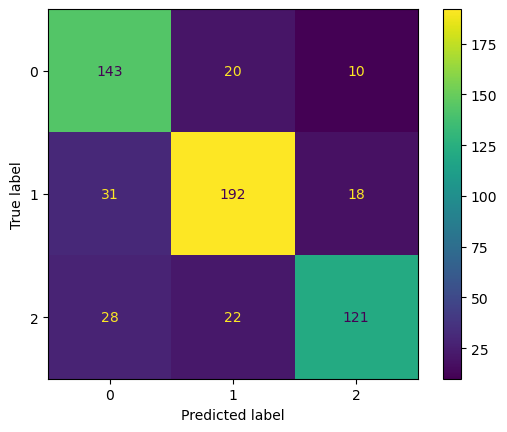

In [94]:
y_pred_train = knn_clf.predict(x_train)

plot_confusion_matrix(knn_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.6802721088435374

              precision    recall  f1-score   support

           0       0.72      0.55      0.63        56
           1       0.70      0.75      0.73        57
           2       0.60      0.76      0.68        34

    accuracy                           0.68       147
   macro avg       0.68      0.69      0.68       147
weighted avg       0.69      0.68      0.68       147



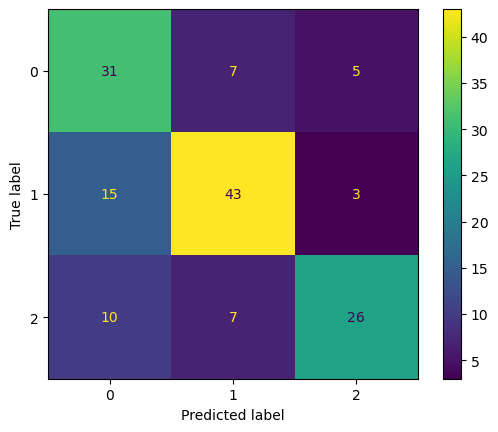

In [95]:
y_pred_test = knn_clf.predict(x_test)

plot_confusion_matrix(knn_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [96]:
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors" : np.arange(3,30),
                  "p": [1,2]}

gscv_knn_clf = GridSearchCV(knn_clf, param_grid, cv = 5 , n_jobs = -1) 
gscv_knn_clf.fit(x_train, y_train) 



GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [97]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=17)

0.7401709401709402

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       182
           1       0.79      0.73      0.76       261
           2       0.65      0.79      0.72       142

    accuracy                           0.74       585
   macro avg       0.73      0.74      0.74       585
weighted avg       0.75      0.74      0.74       585



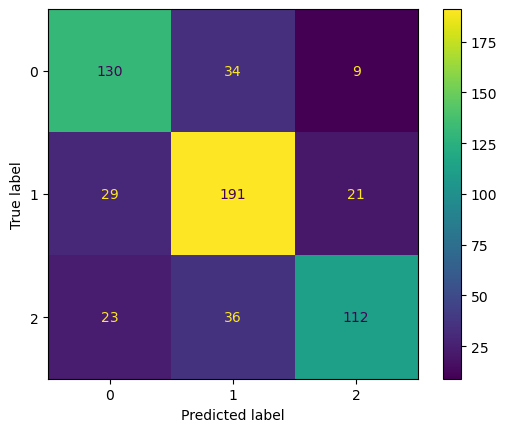

In [98]:
y_pred_train = gscv_knn_clf.predict(x_train)

plot_confusion_matrix(gscv_knn_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.7210884353741497

              precision    recall  f1-score   support

           0       0.72      0.61      0.66        51
           1       0.82      0.79      0.81        63
           2       0.58      0.76      0.66        33

    accuracy                           0.72       147
   macro avg       0.71      0.72      0.71       147
weighted avg       0.73      0.72      0.72       147



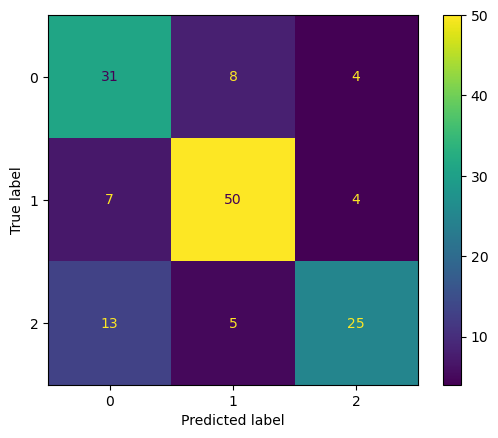

In [99]:
y_pred_test = gscv_knn_clf.predict(x_test)

plot_confusion_matrix(gscv_knn_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [100]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
# model_details.append("SVM")

SVC()

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



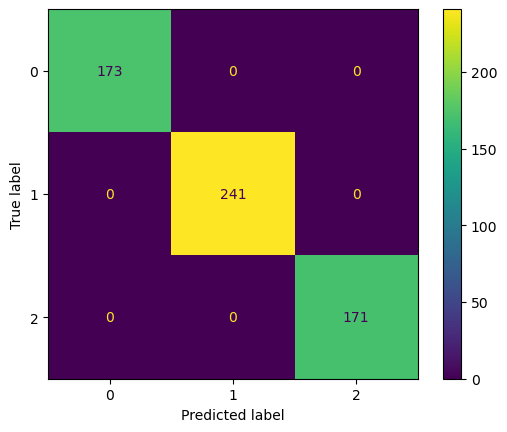

In [101]:
y_pred_train = svm_clf.predict(x_train)

plot_confusion_matrix(svm_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.6530612244897959

              precision    recall  f1-score   support

           0       0.49      0.84      0.62        25
           1       0.97      0.57      0.72       103
           2       0.37      0.84      0.52        19

    accuracy                           0.65       147
   macro avg       0.61      0.75      0.62       147
weighted avg       0.81      0.65      0.68       147



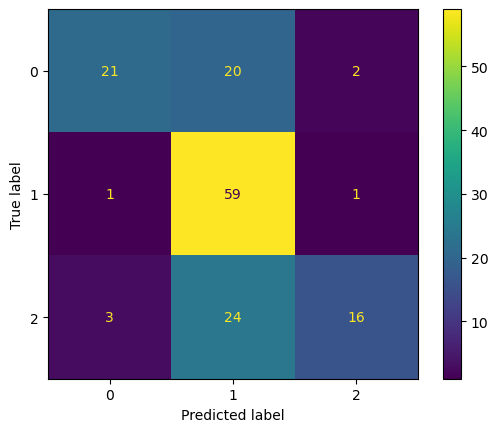

In [102]:
y_pred_test = svm_clf.predict(x_test)

plot_confusion_matrix(svm_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [103]:
svm_clf = SVC()

param_grid = {"C": np.arange(1,1000), "kernel":['linear', 'poly', 'rbf', 'sigmoid']}  # bydefault kernel = rbf

rscv_svm = RandomizedSearchCV(svm_clf, param_grid, cv = 5, n_jobs=-1)
rscv_svm.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  9...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991

In [104]:
rscv_svm.best_estimator_
rscv_svm.fit(x_train, y_train)
# model_details.append("svm_hyperparameter_tunning")

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  9...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



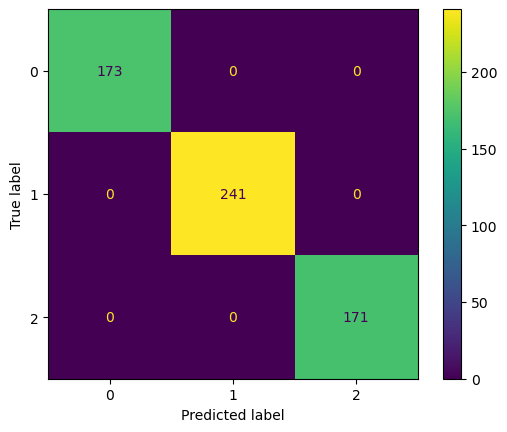

In [105]:
y_pred_train = rscv_svm.predict(x_train)

plot_confusion_matrix(rscv_svm,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.7482993197278912

              precision    recall  f1-score   support

           0       0.63      0.77      0.69        35
           1       0.87      0.73      0.79        73
           2       0.70      0.77      0.73        39

    accuracy                           0.75       147
   macro avg       0.73      0.76      0.74       147
weighted avg       0.77      0.75      0.75       147



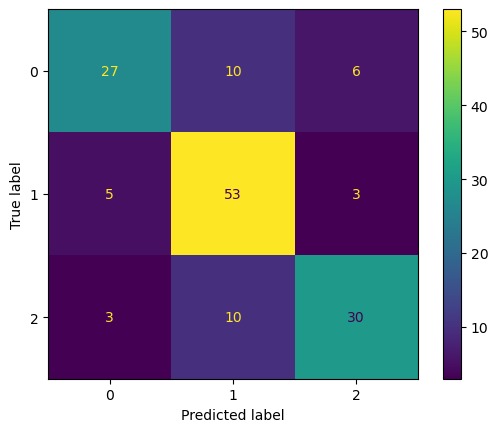

In [106]:
y_pred_test = rscv_svm.predict(x_test)

plot_confusion_matrix(rscv_svm,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [107]:
comparison_df = pd.DataFrame({"Models": model_details, "count_v_Training Accuracy": training_accuracy_list,"count_v_Testing Accuracy": testing_accuracy_list,"tfidf_training_accuracy":training_accuracy,"tfidf_Testing Accuracy": testing_accuracy})
comparison_df

,Models,count_v_Training Accuracy,count_v_Testing Accuracy,tfidf_training_accuracy,tfidf_Testing Accuracy
0,logistic_regression,1.000000,0.768707,0.991453,0.693878
1,Decision_Tree,1.000000,0.680272,1.000000,0.721088
2,Decision_Tree With Hyperparameter tuning,0.635897,0.578231,0.637607,0.578231
3,Random Forest,1.000000,0.734694,1.000000,0.707483
4,Random _Forest With Hyperparameter tuning,0.598291,0.551020,0.536752,0.482993
5,AdaBost,0.750427,0.605442,0.813675,0.646259
6,AdaBost_with_hyperparameter_tuning,0.767521,0.666667,0.844444,0.687075
7,Knn_Model,0.770940,0.619048,0.779487,0.680272
8,knn_model_with_Hyperparameter_Tuning,0.811966,0.612245,0.740171,0.721088
9,SVM,0.986325,0.673469,1.000000,0.653061


In [ ]:
#### selected model is k-nearest neighbour with hyperparameter tuning

In [108]:
import pickle

pickle.dump(tfidf_vect,open("tfidf.pkl","wb"))

In [109]:
pickle.dump(gscv_knn_clf,open("model.pkl","wb"))